## Final Project Submission

Please fill out:
* Student name: Yvonne Nthenya
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Veronica Isaho
* Blog post URL: 


In [1]:
#checking the contents of the file
! ls

CONTRIBUTING.md
LICENSE.md
README.md
awesome.gif
bom.movie_gross.csv.gz
im.db
movie_data_erd.jpeg
student.ipynb
zippedData


In [2]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 


In [3]:
#creating a connection to the database
conn = sqlite3.connect('im.db')


In [4]:
#viewing the list of tables in im.db
imdb = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
#viewing the movie_basics table
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#viewing the movie_ratings table
pd.read_sql("SELECT * FROM movie_ratings;", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### Joining the movie_basics table with movie_ratings dataframe
This will create one table giving us a clearer understanding of what we are working with


### Filtering the data
- remove all the NULL values in the runtime_minutes
- I will only consider movies that got over 400,000 votes.

In [7]:
#joining the movie_basics table with the movie_ratings table to form movie_info dataframe
combined = """
SELECT *
FROM movie_basics
JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
    WHERE runtime_minutes IS NOT NULL AND  numvotes > 400000
    
    ORDER BY averagerating DESC
    
    
;
"""
movie_info = pd.read_sql(combined, conn)


In [8]:
#viewing movie_info
movie_info

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",tt4154796,8.8,441135
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",tt1675434,8.5,677343
4,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",tt2582802,8.5,616916
...,...,...,...,...,...,...,...,...,...
100,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",tt1298650,6.6,447624
101,tt1411697,The Hangover Part II,The Hangover Part II,2011,102.0,"Comedy,Mystery",tt1411697,6.5,432800
102,tt2975590,Batman v Superman: Dawn of Justice,Batman v Superman: Dawn of Justice,2016,151.0,"Action,Adventure,Fantasy",tt2975590,6.5,576909
103,tt2872732,Lucy,Lucy,2014,89.0,"Action,Sci-Fi,Thriller",tt2872732,6.4,403194


### Importing Box Office Movies csv file

In [9]:
#importing "bom.movie_gross.csv" file and assigning to the variable bom_df
bom_df = pd.read_csv('bom.movie_gross.csv.gz')


In [10]:
#viewing bom_df
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Joining the movie_info dataframe to bom_df dataframe

First we will set the 'primary_title' column in movie_info and 'title' column in bom_df as index columns


In [11]:
#setting the primary_title column as the index column
movie_info.set_index('primary_title', inplace=True)
movie_info.head()

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
primary_title,,,,,,,,
Inception,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
Avengers: Endgame,tt4154796,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",tt4154796,8.8,441135
Interstellar,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
The Intouchables,tt1675434,Intouchables,2011,112.0,"Biography,Comedy,Drama",tt1675434,8.5,677343
Whiplash,tt2582802,Whiplash,2014,106.0,"Drama,Music",tt2582802,8.5,616916


In [12]:
#setting the title column as the index column
bom_df.set_index('title', inplace=True)
bom_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
#joining the two dataframes to form movies dataframe
movies = movie_info.join(bom_df, how='inner')
movies

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
12 Years a Slave,tt2024544,12 Years a Slave,2013,134.0,"Biography,Drama,History",tt2024544,8.1,577301,FoxS,56700000.0,131100000,2013
21 Jump Street,tt1232829,21 Jump Street,2012,109.0,"Action,Comedy,Crime",tt1232829,7.2,477771,Sony,138400000.0,63100000,2012
American Hustle,tt1800241,American Hustle,2013,138.0,"Crime,Drama",tt1800241,7.2,418221,Sony,150100000.0,101100000,2013
American Sniper,tt2179136,American Sniper,2014,133.0,"Action,Biography,Drama",tt2179136,7.3,401915,WB,350100000.0,197300000,2014
Ant-Man,tt0478970,Ant-Man,2015,117.0,"Action,Adventure,Comedy",tt0478970,7.3,501213,BV,180200000.0,339100000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
Whiplash,tt2582802,Whiplash,2014,106.0,"Drama,Music",tt2582802,8.5,616916,SPC,13100000.0,35900000,2014
Wonder Woman,tt0451279,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",tt0451279,7.5,487527,WB,412600000.0,409300000,2017
World War Z,tt0816711,World War Z,2013,116.0,"Action,Adventure,Horror",tt0816711,7.0,553751,Par.,202400000.0,337600000,2013
X-Men: Days of Future Past,tt1877832,X-Men: Days of Future Past,2014,132.0,"Action,Adventure,Sci-Fi",tt1877832,8.0,620079,Fox,233900000.0,513900000,2014


### What Genre of movies is most common?
After merging the data and filtering, I was left with 94 movies to analyze.
Now we find what genre of movie is common among these movies

In [14]:
#converting the genre column into a list
genre_list = movies.genres.values.tolist()
genre_list

['Biography,Drama,History',
 'Action,Comedy,Crime',
 'Crime,Drama',
 'Action,Biography,Drama',
 'Action,Adventure,Comedy',
 'Biography,Drama,Thriller',
 'Drama,Mystery,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Drama,Thriller',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Comedy,Drama,Romance',
 'Biography,Drama',
 'Action,Adventure,Comedy',
 'Animation,Comedy,Family',
 'Drama,Western',
 'Action,Adventure,Fantasy',
 'Action,Drama,History',
 'Action,Sci-Fi',
 'Drama,Mystery,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Horror,Mystery,Thriller',
 'Drama,Mystery,Thriller',
 'Drama,Sci-Fi,Thriller',
 'Action,Adventure,Comedy',
 'Action,Adventure,Comedy',
 'Action,Adventure,Animation',
 'Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Adventure,Drama,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Crime,Thriller',
 'Action,Adventure,Sci-F

In [15]:
# splitting the strings
new_genre_list = []
for i in genre_list:
    small_list = i.split(",")
    new_genre_list += small_list
    
new_genre_list

['Biography',
 'Drama',
 'History',
 'Action',
 'Comedy',
 'Crime',
 'Crime',
 'Drama',
 'Action',
 'Biography',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'Thriller',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Drama',
 'Romance',
 'Biography',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Animation',
 'Comedy',
 'Family',
 'Drama',
 'Western',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Drama',
 'History',
 'Action',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Animation',
 'Comedy',
 'Horror',
 'Mystery',
 'Thriller',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'A

In [16]:
#calculate the frequency of each genre in the list
value, counts = np.unique(new_genre_list, return_counts=True)
genre_name = list(value)
genre_frequency = list(counts)

Text(0.5, 1.0, 'Frequency of each Genre in the top 94 most voted movies')

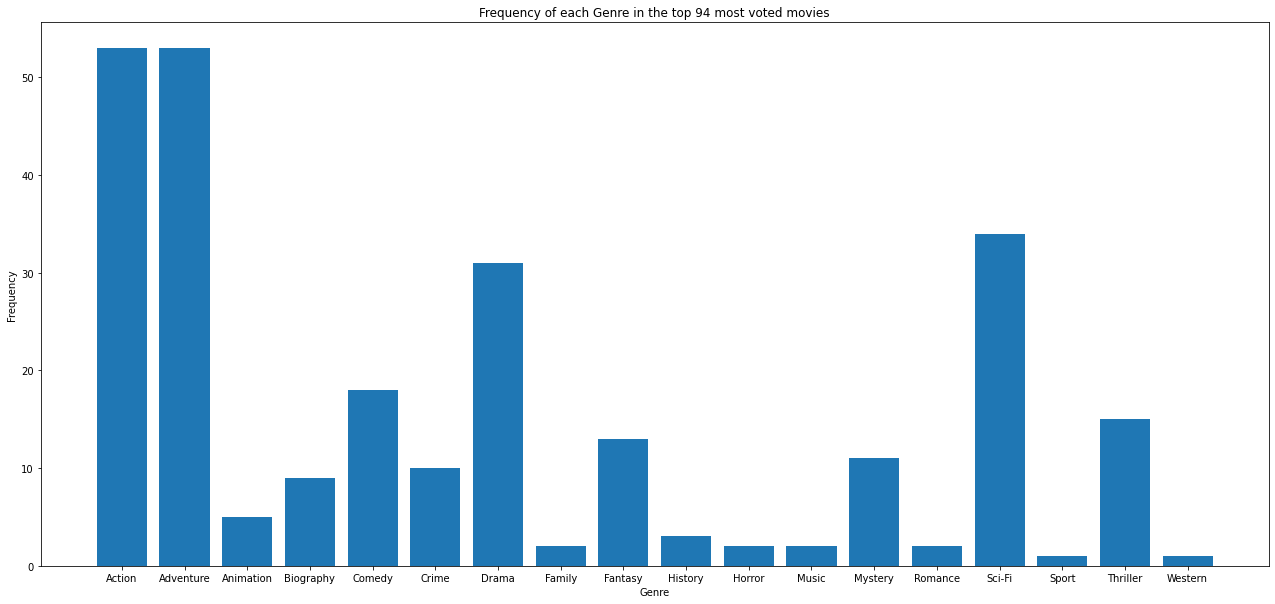

In [46]:
#plotting a bar graph showing the frequency of each genre among the 94 movies

fig = plt.figure(figsize = (22, 10))

plt.bar(genre_name, genre_frequency, width = 0.8)
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of each Genre in the top 94 most voted movies")

### What Genre has the most highest ratings amond the top 50 highest rated movies?


In [18]:
#sorting ratings
movies.sort_values(by=['averagerating'], ascending=False, inplace=True)
movies.head(50)

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
Inception,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,WB,292600000.0,535700000,2010
Interstellar,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Par.,188000000.0,489400000,2014
Whiplash,tt2582802,Whiplash,2014,106.0,"Drama,Music",tt2582802,8.5,616916,SPC,13100000.0,35900000,2014
Avengers: Infinity War,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",tt4154756,8.5,670926,BV,678800000.0,"1,369.5",2018
The Dark Knight Rises,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,WB,448100000.0,636800000,2012
Django Unchained,tt1853728,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Wein.,162800000.0,262600000,2012
Toy Story 3,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218,BV,415000000.0,652000000,2010
Warrior,tt1291584,Warrior,2011,140.0,"Drama,Sport",tt1291584,8.2,403755,LGF,13700000.0,9400000,2011
The Wolf of Wall Street,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,Par.,116900000.0,275100000,2013
Inside Out,tt2096673,Inside Out,2015,95.0,"Adventure,Animation,Comedy",tt2096673,8.2,536181,BV,356500000.0,501100000,2015


In [19]:
#converting the genre column into a list
top_50_movie_genre = movies.head(50).genres.values.tolist()
top_50_movie_genre

['Action,Adventure,Sci-Fi',
 'Adventure,Drama,Sci-Fi',
 'Drama,Music',
 'Action,Adventure,Sci-Fi',
 'Action,Thriller',
 'Drama,Western',
 'Adventure,Animation,Comedy',
 'Drama,Sport',
 'Biography,Crime,Drama',
 'Adventure,Animation,Comedy',
 'Adventure,Comedy,Crime',
 'Action,Adventure,Animation',
 'Drama,Mystery,Thriller',
 'Action,Adventure,Sci-Fi',
 'Biography,Drama,History',
 'Mystery,Thriller',
 'Crime,Drama,Mystery',
 'Action,Adventure,Comedy',
 'Drama',
 'Biography,Drama',
 'Action,Adventure,Comedy',
 'Adventure,Drama,Sci-Fi',
 'Action,Adventure,Biography',
 'Biography,Drama,History',
 'Drama,Thriller',
 'Biography,Drama,Thriller',
 'Comedy,Drama,Music',
 'Action,Adventure,Sci-Fi',
 'Adventure,Drama,Fantasy',
 'Action,Sci-Fi',
 'Adventure,Family,Fantasy',
 'Action,Drama,History',
 'Action,Adventure,Comedy',
 'Drama,Mystery,Sci-Fi',
 'Crime,Drama,Thriller',
 'Crime,Drama,Mystery',
 'Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Thriller',
 'Action,Adventure,S

In [20]:
# splitting the strings
new_top_50_movie_genre_list = []
for i in top_50_movie_genre:
    smaller_list = i.split(",")
    new_top_50_movie_genre_list += smaller_list
    
new_top_50_movie_genre_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Thriller',
 'Drama',
 'Western',
 'Adventure',
 'Animation',
 'Comedy',
 'Drama',
 'Sport',
 'Biography',
 'Crime',
 'Drama',
 'Adventure',
 'Animation',
 'Comedy',
 'Adventure',
 'Comedy',
 'Crime',
 'Action',
 'Adventure',
 'Animation',
 'Drama',
 'Mystery',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Drama',
 'History',
 'Mystery',
 'Thriller',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Biography',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Biography',
 'Biography',
 'Drama',
 'History',
 'Drama',
 'Thriller',
 'Biography',
 'Drama',
 'Thriller',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Action',
 'Drama'

In [21]:
#calculate the frequency of each genre in the list
value1, counts1 = np.unique(new_top_50_movie_genre_list, return_counts=True)
top_50_genre_name = list(value1)
top_50_genre_frequency = list(counts1)

Text(0.5, 1.0, 'Frequency of each Genre among the 50 highest rated movies')

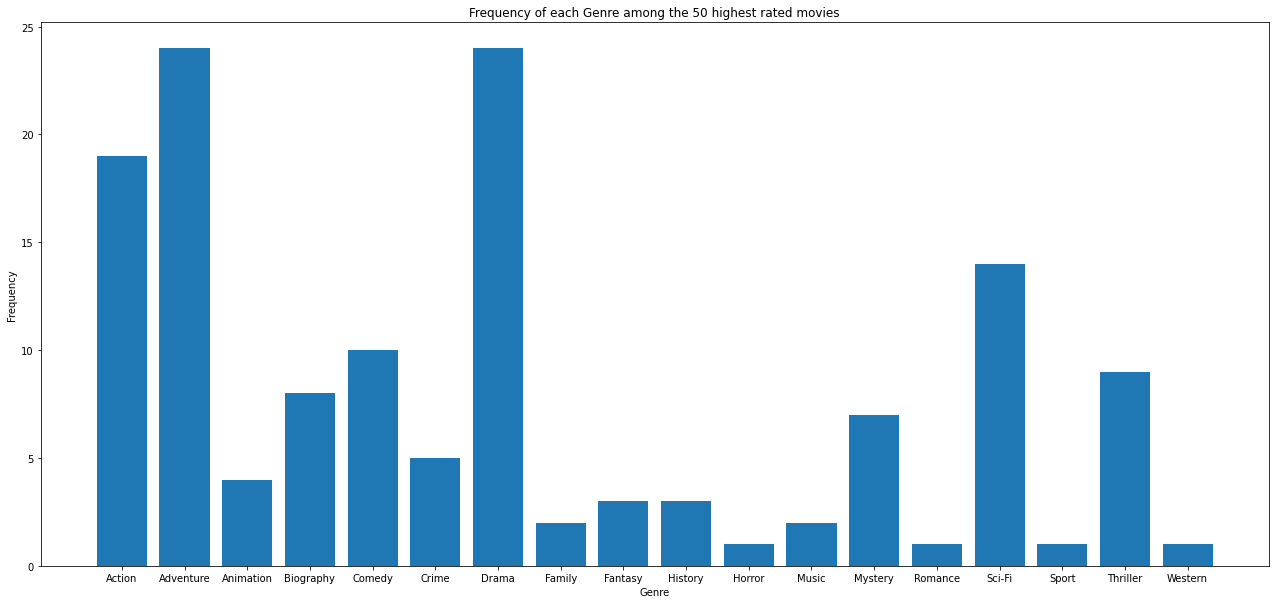

In [47]:
#plotting a bar graph showing the frequency of each genre among the top 50 highest rated movies

fig = plt.figure(figsize = (22, 10))

plt.bar(top_50_genre_name, top_50_genre_frequency, width = 0.8)
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of each Genre among the 50 highest rated movies")

### What Genre has the highest paying movies?
Here we will find what genre of movie yields best returns.
- create a new column "Total Gross" that is the sum of "domestic gross" and "foreign gross"
- filter to get the top 50 highest earning movies
- plot a graph of each genre against its frequency in the highest paying movies

In [23]:
# convert the 'domestic_gross' and 'foreign_gross' columns to string and remove the commas.
movies['domestic_gross'] =movies['domestic_gross'].astype(str)
movies['foreign_gross'] =movies['foreign_gross'].astype(str)
movies['domestic_gross'] = movies['domestic_gross'].str.replace(',','')
movies['foreign_gross'] = movies['foreign_gross'].str.replace(',','')

In [25]:
# convert the 'domestic_gross' and 'foreign_gross' columns to integer and float respectively.
movies['domestic_gross'] =movies['domestic_gross'].astype(float)
movies['foreign_gross'] =movies['foreign_gross'].astype(float)

In [34]:
# find the sum of 'domestic_gross' and 'foreign_gross' and put in a new column 'Total Gross'
movies['Total Gross'] = movies.domestic_gross + movies.foreign_gross

In [36]:
# sort in descending order and select the top 50
movies.sort_values(by=['Total Gross'], ascending=False, inplace=True)
movies.head(50)

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,Total Gross
Avengers: Age of Ultron,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",tt2395427,7.3,665594,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,tt1825683,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",tt1825683,7.3,516148,BV,700100000.0,646900000.0,2018,1.347000e+09
Star Wars: The Last Jedi,tt2527336,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",tt2527336,7.1,462903,BV,620200000.0,712400000.0,2017,1.332600e+09
Frozen,tt2294629,Frozen,2013,102.0,"Adventure,Animation,Comedy",tt2294629,7.5,516998,BV,400700000.0,875700000.0,2013,1.276400e+09
Iron Man 3,tt1300854,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",tt1300854,7.2,692794,BV,409000000.0,805800000.0,2013,1.214800e+09
Captain America: Civil War,tt3498820,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",tt3498820,7.8,583507,BV,408100000.0,745200000.0,2016,1.153300e+09
Skyfall,tt1074638,Skyfall,2012,143.0,"Action,Adventure,Thriller",tt1074638,7.8,592221,Sony,304400000.0,804200000.0,2012,1.108600e+09
The Dark Knight Rises,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,WB,448100000.0,636800000.0,2012,1.084900e+09
Toy Story 3,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",tt0435761,8.3,682218,BV,415000000.0,652000000.0,2010,1.067000e+09
Rogue One: A Star Wars Story,tt3748528,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",tt3748528,7.8,478592,BV,532200000.0,523900000.0,2016,1.056100e+09


In [37]:
#converting the genre column into a list
top_50_total_gross = movies.head(50).genres.values.tolist()
top_50_total_gross

['Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Thriller',
 'Action,Thriller',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Adventure,Family,Fantasy',
 'Adventure,Fantasy',
 'Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Comedy',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Comedy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Comedy',
 'Action,Adventure,Comedy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Drama,Sci-Fi,Thriller',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Thriller',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Adventure,Drama,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-

In [38]:
# splitting the strings
new_top_50_total_gross_list = []
for i in top_50_total_gross:
    smallest_list = i.split(",")
    new_top_50_total_gross_list += smallest_list
    
new_top_50_total_gross_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Thriller',
 'Action',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Family',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Action'

In [39]:
#calculate the frequency of each genre in the list
value2, counts2 = np.unique(new_top_50_total_gross_list, return_counts=True)
top_50_gross_name = list(value2)
top_50_gross_frequency = list(counts2)

Text(0.5, 1.0, 'Frequency of each Genre among the 50 highest earning movies')

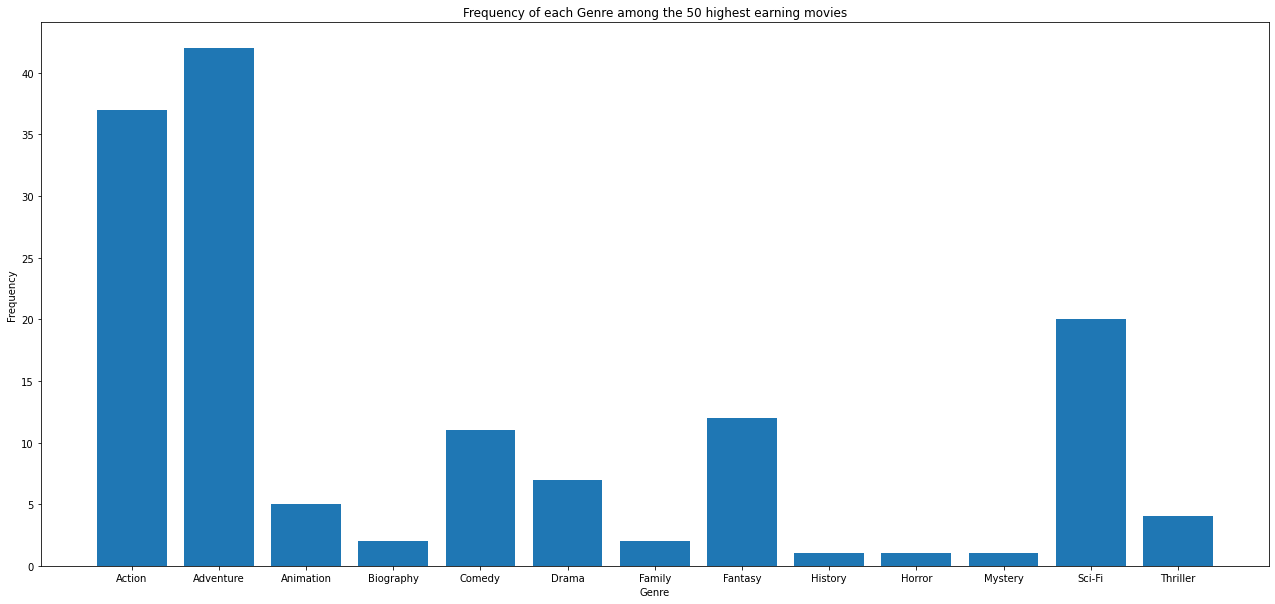

In [50]:
#plotting a bar graph showing the frequency of each genre among the top 50 highest paying movies

fig = plt.figure(figsize = (22, 10))

plt.bar(top_50_gross_name, top_50_gross_frequency, width = 0.8)
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of each Genre among the 50 highest earning movies")

### Does the run time affect the rating of the movie?

In [52]:
#finding the correlation coefficient between run time and movie rating
correlation = movies['runtime_minutes'].corr(movies['averagerating'])
correlation

0.19997036525914486

The correlation coefficient between run time of a movie and its rating is 0.199997.
This shows a very weak posititive correlation between the two variables.

In [41]:
# sort the movies in descending order based on the run time
movies.sort_values(by=['runtime_minutes'], ascending=False, inplace=True)

Text(0.5, 1.0, 'A representation of Run-time against movie rating')

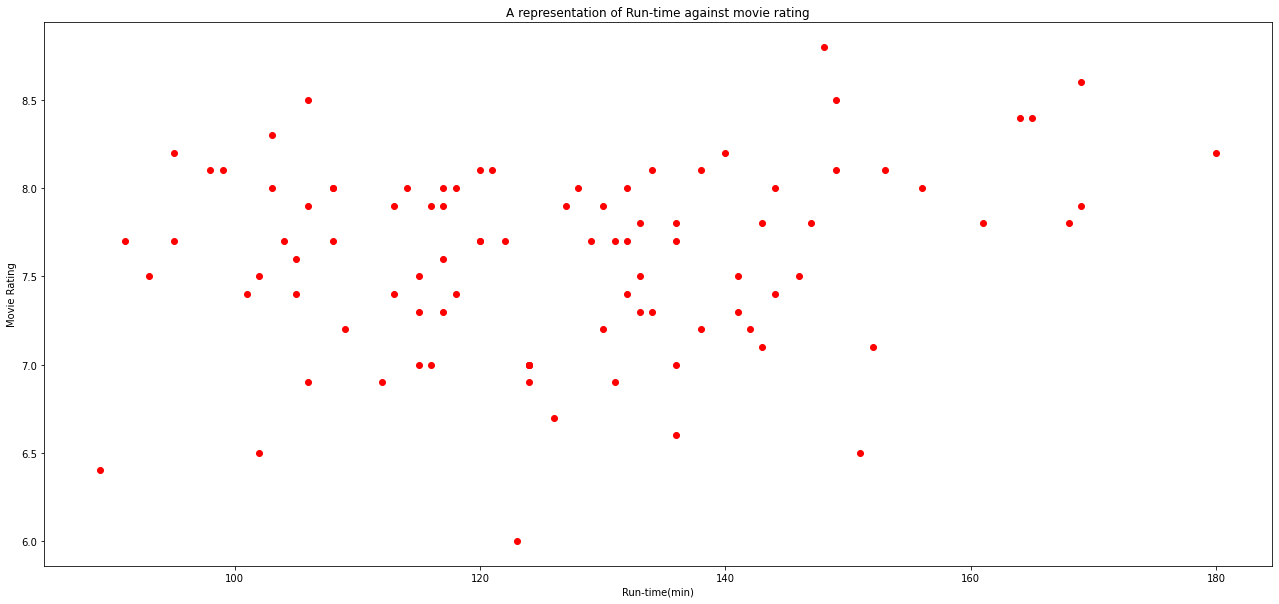

In [54]:
# plotting a scatter plot of run_time against movie rating
fig = plt.figure(figsize = (22, 10))

plt.scatter(movies['runtime_minutes'], movies['averagerating'], color='red', marker='o')

plt.xlabel("Run-time(min)")
plt.ylabel("Movie Rating")
plt.title("A representation of Run-time against movie rating")

We can confirm that the run time does not affect the movie rating